# Speed Limits and Accidents in Minnesota
### Team Members:
- Robert
- Jon
- Calvin
- Mike

## Motivations and Summary

text here

## Questions and Data

text here

## Data Cleanup & Exploration

text here

## Data Analysis

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import time
import os
from scipy.stats import linregress
from citipy import citipy
import scipy.stats as stats
from citipy import citipy

In [ ]:
# import csv
file = 'Resources/AccidentDataWithSpeed.csv'
df = pd.read_csv(file)
df.head()

In [ ]:
# Calvin's heat map starts here

We started by visualizing density of incidents by locations on a map of Minnesota.

We then weighted by severity but because the amount of severity 2 incidents greatly outwieghs all other points it didn't show us anything significantly different than simply density of points.



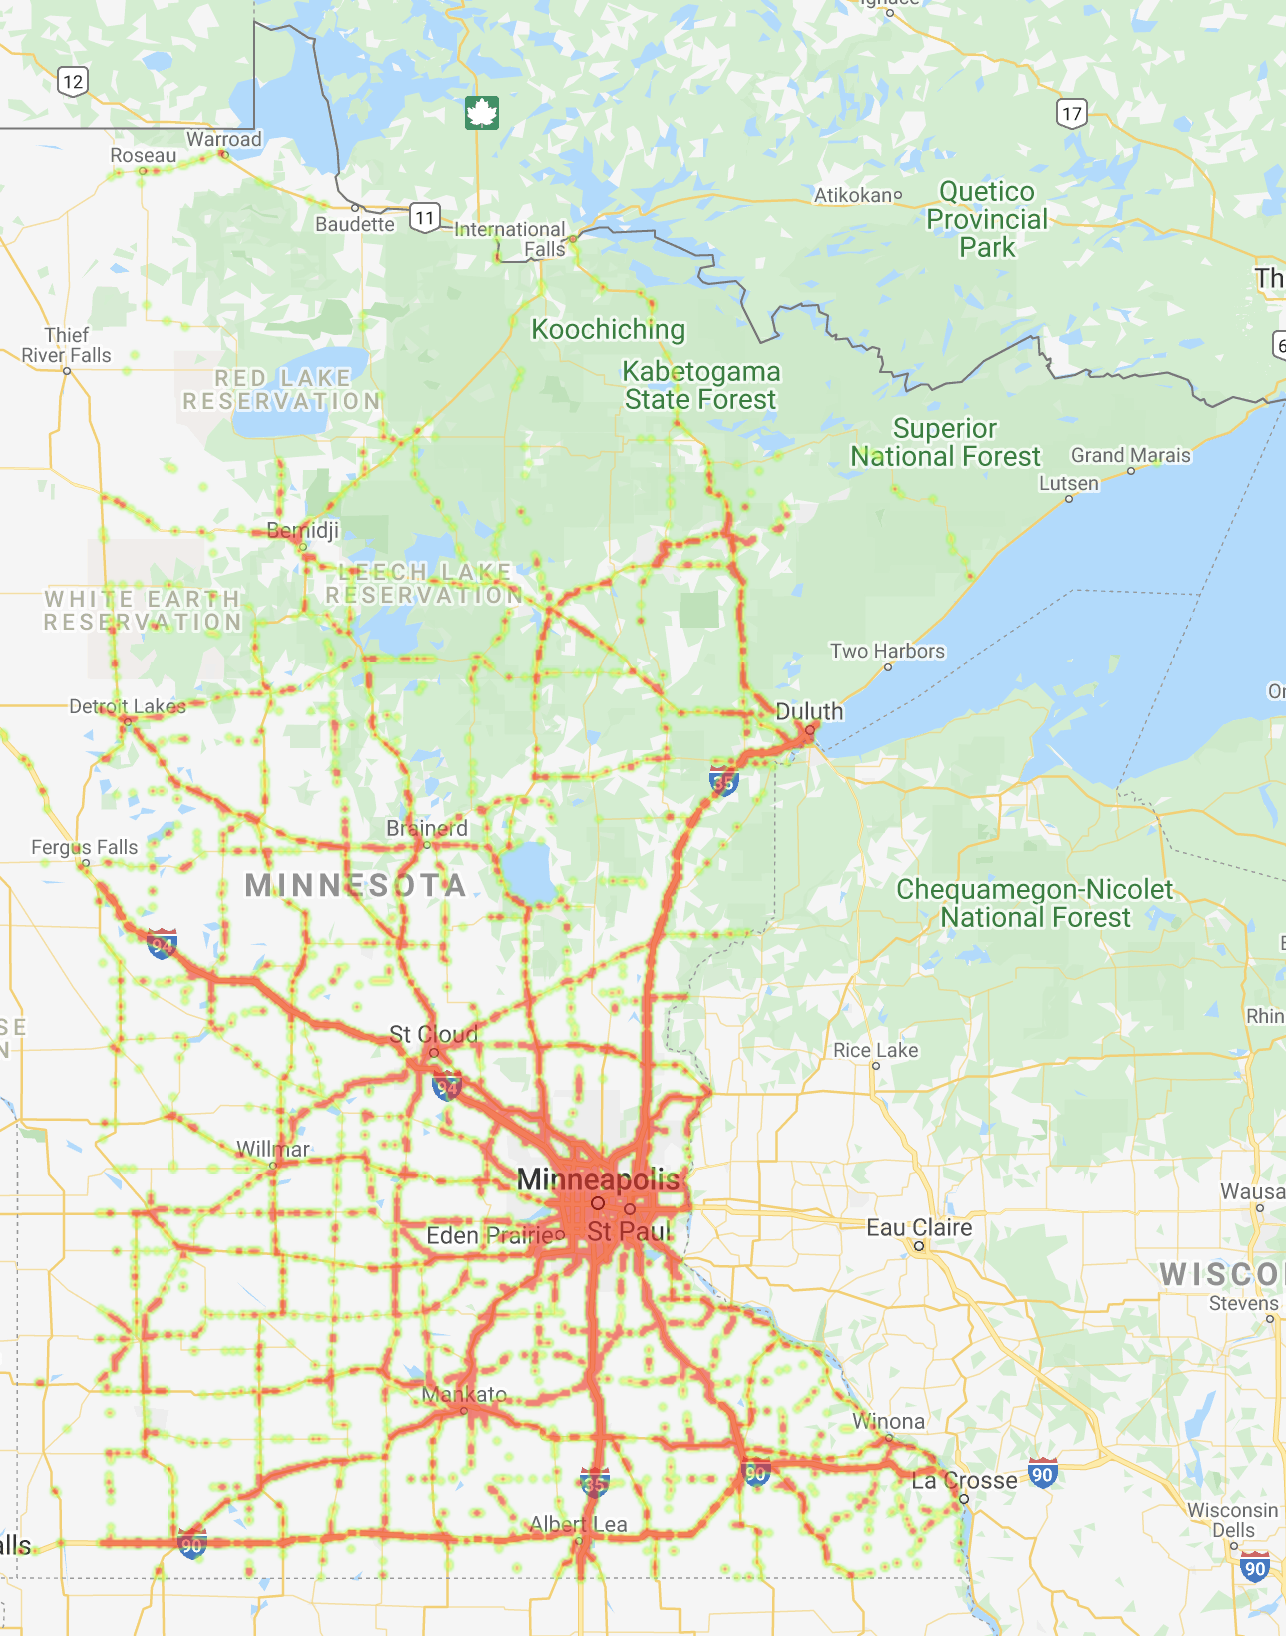

In [ ]:
# Calvin's heat map ends here

In [ ]:
# Jon's graphs start here

In [ ]:
# Jon's graphs end here

In [ ]:
# Mike's hypothesis starts here

In [ ]:
# Mike's hypothesis ends here

In [ ]:
# Roberts's regression starts here

In [ ]:
# Robert's regression ends here

## Discussion

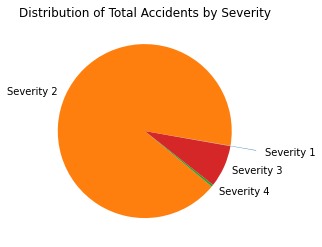


For our first question found what we expected.  We expected that as speed inceases the number of incidents increases as well.  Using an ANOVA test we got a p-value of 0.002 rejecting our null hypothesis and suggesting our hypothesis was correct higher speeds are correlated to higher crash incidents.
    
    
Our second question of whether higher speeds correlate to severity of accidents we were unable to draw any meaningful conclusions.  The severity data was not what we thought it was, it represented impact on traffic delays rather than physical injury outcomes.  Another issue was the way the data was distributed, the shear number on data points for category 2 skewed the data too much that statistical tests were inconclusive.   
   
   



## Post Mortem

## Questions